_This post is a draft and only here temporarily, it will find a new home somewhere else!_

# I think we played a strong first half

## Introduction

The Dutch football league (de Eredivisie) just past it's halfway point. Certainly nothing is decided yet, as the prizes will not be given out untill May. However, the matches played up untill now do give an indication as to which teams are contenders for the title and which teams will have to fear relegation. Using multilevel modelling we can learn a model from the matches played in the first half, which can be used to simulate the remaining matches. Using these simulations we can predict an expected ranking. Our approach to learning these models will be a Bayesian one and we will sample possible models using the python package [pymc3](http://docs.pymc.io/index.html).

## The model

Football isn't all that a complicated game when you think about it. Two teams try to score by putting the ball into the other teams goal. We model the number of goals for both teams as independent random variables. The parameters, which encode attacking potential, defensive capabilities and home advantages of each team, are learned from the matches played. 

This model is a variation on existing approaches. The hierarchical modelling of the home advantages may be new, we haven't seen it before. The model is pretty simple, and doesn't take into account current form or the fact that Robin van Persie just joined Feyenoord. 

## Results

Before diving into the implementation details, we provide an overview of the results. This is to accomodate all you coaches on the couch who are not necessarily interested in non-centered specification! Let's first look at the parameters that the model has inferred for the Dutch teams. 

The attack rate corresponds to the number of goals scored on average, while the defense rate is a score that measures the number of goals prevented. In fact, on average, ignoring the home advantage, this model predicts the following estimates the number of goals in the next match between Zwolle and Utrecht for example. 

$$
\begin{align}
\text{goals by Zwolle} &= \exp\left(\text{Zwolle attack rate} - \text{Utrecht defense rate}\right) \\
&\approx \exp\left(0.1 - 0.0\right) \approx 1.1 \, \text{goals}\\
\text{goals by Utrecht} &= \exp\left(\text{Utrecht attack rate} - \text{Zwolle defense rate}\right) \\
&\approx \exp\left(0.2 - 0.08\right) \approx 1.3 \, \text{goals}
\end{align}
$$

This is a tight matchup, which might swing, according to the model, in favor of Zwolle if the match were to take place on their home field, because they defend better at home ground. 

![](/assets/images/Netherlands_stats_2018-02-07.png)

At the moment, PSV is leading the competition. Our model thinks Ajax does slightly better on both offense and defense, which is not surprising considering that Ajax has scored more and accepted less goals this year. Feyenoord, third in the ranking, seems to just not have the scoring potential to challenge the first two, allthough they are defending among the best. We sorted the positions on attacking rate only. Zwolle, another team that's doing well in the standings, is not really scoring a lot, but they are defending well. Also interesting is that they are among the few teams that seem to defend slightly better at home. Most teams in the Dutch competition seem to lower their defenses at home, while increasing their scoring potential, perhaps to offer their home crowd a good show? Next to Zwolle, PSV, Ajax and Heracles also defend better at home, the difference between those teams being that Heracles has one of the least effective defenses to begin with. 

If we run the simulations based on these ratings, the results at the end of this season are projected as follows. 

![](/assets/images/Netherlands_expected_positions_heatmap_2018-02-07.png)

According to this model, PSV is a pretty big favorite. Ajax is given a 15% probability of actually surpassing them. The point difference is 7 at the moment, but with their good scoring potential and solid defense, the model does still give them a 15% probability of winning the competition. Positions are less certain at the bottom and the middle of the pack, where a single victory can make a large difference in terms of ranking. The model predicts a lower final ranking for Zwolle, ranked 4th at the moment, while anticipating a good finish for Groningen. These are reasonable predictions if you also take into account their current goal tallies. 

We have run the same model for a couple of big soccer leagues in Europe. You can find the results of these models below, and it's interesting to note that the Dutch league is actually still one of the more exciting competitions, as the victories of superteams like Bayern Munchen, Barcelona and Manchester City seem all but certain. The most exciting competition is the Italian Primera Division, with the teams battling for the overall win both around 50%. 


![](/assets/images/Italy_expected_positions_heatmap_2018-02-07.png)

While conceptually simple, we think the model does a very good job of estimating interpretable parameters, and converting those into reasonable projections. One thing it does take into account very well is the remaining schedule for the teams, taking into account whether they have played against the stronger opponents already. For some teams, their point total can be slightly inflated due to having played mostly the weaker opposition up until now. This will become especially relevant at the end of the season.

There is still a lot of interesting insights to be learned from the parameters and the comparison with other leagues, and if you're interested in more details, or up-to-date projections, feel free to reach out! Before diving into the implementation of the model, we first list all the above visualizations for a couple of European leagues. 

## Bundesliga

In Germany, there is a clear best team, Bayern Munchen, and given their current point advantage, we're willing to take a pretty skewed bet on them winning. After the first position however, things are still exciting with many teams in contention for second place. Compared to the Dutch league, the home advantages are much larger in Germany. 

### Bundesliga predictions

![](/assets/images/Germany_expected_positions_heatmap_2018-02-07.png)

### Bundesliga estimated team stats

![](/assets/images/Germany_stats_2018-02-07.png)

## La Liga

In Spain, as in Germany, the top spot is pretty much taken. Atletico is also pretty certain of its second place it seems. That is not due to their scoring potential, but their defensive capabilities have shown to be rivaled only by Barcelona, the top team. 

### La Liga predictions

![](/assets/images/Spain_expected_positions_heatmap_2018-02-07.png)

### La Liga estimated team stats

![](/assets/images/Spain_stats_2018-02-07.png)

## Primera Division

This is the most exciting competition if we look at the top spots only. Both The Old Lady and Napoli are in real contention for the overall win. Like in the Dutch competition, teams are not especially defensive when playing in the home crowd, which is the case in the German and the Spanish competitions. The home advantages are not as large as in the German division. 

### Primera Division predictions

![](/assets/images/Italy_expected_positions_heatmap_2018-02-07.png)

### Primera Division estimated team stats

![](/assets/images/Italy_stats_2018-02-07.png)

## Premier League

In England, we can be pretty confident about Manchester City ending up on the top spot. There are again some interesting differences in defensive capabilities, with a team like Burnley doing pretty well despite a very low goal count. In England, there is a clear lower bracket, where even the last spot is still pretty open. West Brom, the current lowest ranked team, still has some chances of reaching up to 15th or even 12th position. 

### Premier League predictions

![](/assets/images/England_expected_positions_heatmap_2018-02-07.png)

### Premier League estimated team stats

![](/assets/images/England_stats_2018-02-07.png)

### Implementation

We implement a Bayesian multilevel model using `pymc3`, a package that implements the No-U-Turn-Sampler and is built on Theano. To understand what's going on requires knowledge of Bayesian modelling and the `pymc3` package. If you're new to that, we recommend for example the online workbook [Probabilistic Programming and Bayesian Methods for Hackers](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers). 

We view a football match as two independent Poisson processes that produce a number of goals for each side. Using an exponential link function, the rate parameters are a sum of attacking rate, respective defense rates and a bonus on both attacking and defending for the home team. 

$$\text{home goals}\ \tilde{}\ \text{Poisson}(\exp\left(\mu_{\text{home}}\right)) \\ \text{away goals}\ \tilde{}\ \text{Poisson}(\exp\left(\mu_{\text{away}}\right))$$

Where $\mu$ is the rate parameter in each direction. 

In [42]:
# Import the necessary packages

import pymc3 as pm
import pandas as pd

%pylab inline

np.random.seed(10)

Populating the interactive namespace from numpy and matplotlib


/home/gijsx/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['trace']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


The data consists of all matches played until now. In the dataframe, we also included all the matches that haven't been played yet. For each match, `fthg` is the number of goals scored by the home team, and `ftag` is the number of goals scored by the away team. 

In [43]:
# read in the data, downloaded from http://www.football-data.co.uk/data.php

comp = pd.read_feather("./data/nl_comp_07-02-2018.feather")
comp.sample(10)

,hometeam,awayteam,date,fthg,ftag,played
111,Excelsior,Feyenoord,2017-08-20,0.0,1.0,True
281,Excelsior,Heracles,NaT,NaN,NaN,False
236,Willem II,VVV Venlo,NaT,NaN,NaN,False
127,PSV Eindhoven,Heracles,2017-10-22,3.0,0.0,True
188,Zwolle,Groningen,2017-09-30,3.0,2.0,True
1,AZ Alkmaar,Feyenoord,2017-01-10,0.0,4.0,True
59,Vitesse,Willem II,2017-12-13,2.0,2.0,True
130,Den Haag,Sparta Rotterdam,2017-09-23,1.0,0.0,True
279,Ajax,Twente,NaT,NaN,NaN,False
229,Groningen,Zwolle,NaT,NaN,NaN,False


The data is read from the `feather` format, and some cleaning up has been done already to make sure our datatypes are correct. In particular, we make use of the `category` type in `pandas`. It is a useful system, here we use it a lot to translate between index positions in the `pymc3` model and the team names. 

We use a `theano.shared` variable for our "predictors", which team was home and which team was away for each match. This lets us later change these predictors for the matches that we want predictions for, and use the compiled model to efficiently sample simulations.  

In [44]:
import theano

n_teams = len(comp.hometeam.cat.categories)
    
played = comp[comp.played]
not_played = comp[~comp.played]

## create shared predictors
hometeam = theano.shared(played.hometeam.cat.codes.astype('int8').values)
awayteam = theano.shared(played.awayteam.cat.codes.astype('int8').values)

### A good attack starts with a strong defence

In the first definitions below we see the `attack_rate` for each team, to be learned from the data. This corresponds to the amount of goals that each team scored in the first half of the season. 

However there is another important aspect to football, defense. In order to win games a team can not only goals, it can also prevent the other team from scoring more than they do. And just as with scoring goals, some teams are better at this than others.

The first part of the model are the attack and defense rates for each team. These are vectors of length `n_teams`, and we put a hierarchical prior on these parameters, with weak hyperpriors. Keep in mind these parameters will be translated from `log` scale by the exponential link function. In this model, a non-centered version is necessary for efficient sampling. You can read http://elevanth.org/blog/2017/09/07/metamorphosis-multilevel-model/ for some background on that. One point of note here is to make sure that the defense rates are centered on zero. 

In [45]:
with pm.Model() as model:

    attack_hyper = pm.Normal('attack_hyper', 0, 1)
    attack_hyper_sd = pm.Gamma('attack_hyper_sd', 2, 2)
    attack_rate_nc = pm.Normal('attack_rate_nc', 0, 1, shape = n_teams)
    attack_rate = pm.Deterministic('attack_rate', attack_hyper + attack_rate_nc * attack_hyper_sd)

    defense_rate_nc = pm.Normal('defense_rate_nc', 0, 1, shape = n_teams)
    defense_hyper_sd = pm.Gamma('defense_hyper_sd', 2, 2)
    defense_rate = pm.Deterministic('defense_rate', defense_rate_nc * defense_hyper_sd)

### The twelfth man

Another established effect in the outcome of a football is home advantage. 60% of matches is decided in favor of the home side. We have just established that a team has both defensive and attacking qualities and we hypothesize that the home advantage can work on both these qualities. On these we again use a hierarchical prior, with weak hyperpriors. 

In [46]:
with model:
    
    home_attack_hyper_sd = pm.Gamma('hahsd', 2, 2)
    home_attack_hyper = pm.Normal('hah', 0, 1)
    home_attack_nc = pm.Normal('hah_nc', 0, 1, shape = n_teams)    
    home_attack_advantage = pm.Deterministic('home_aadv', home_attack_hyper + home_attack_nc * home_attack_hyper_sd)

    home_defense_hyper = pm.Normal('hdh', 0, 1)
    home_defense_hyper_sd = pm.Gamma("hdhsd", 2, 2)
    home_defense_nc = pm.Normal('hdh_nc', 0, 1, shape = n_teams)
    home_defense_advantage = pm.Deterministic('home_dadv', home_defense_hyper + home_defense_nc * home_defense_hyper_sd)

With these parameters the expected goals are the exponential of the right additions of hometeam and awayteam. 

In [47]:
with model:
    
    home_diff = attack_rate[hometeam] - defense_rate[awayteam] + \
        home_attack_advantage[hometeam]

    away_diff = attack_rate[awayteam] - defense_rate[hometeam] - \
        home_defense_advantage[hometeam]  

The number of goals is a Poisson parameter with an exponential link. Here, we're not accounting for any overdispersion, which is probably a weakness of the model, allthough it might not influence the predictions that much. 

In [48]:
with model:
    
    home_goals = pm.Poisson('home_goals', pm.math.exp(home_diff), observed = played.fthg.values)
    away_goals = pm.Poisson('away_goals', pm.math.exp(away_diff), observed = played.ftag.values)

We use two chains to be able to assess the mixing. Sampling is quite efficient and should take half a minute or so on a normal laptop. The traceplot looks healthy! 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:23<00:00, 65.17it/s]


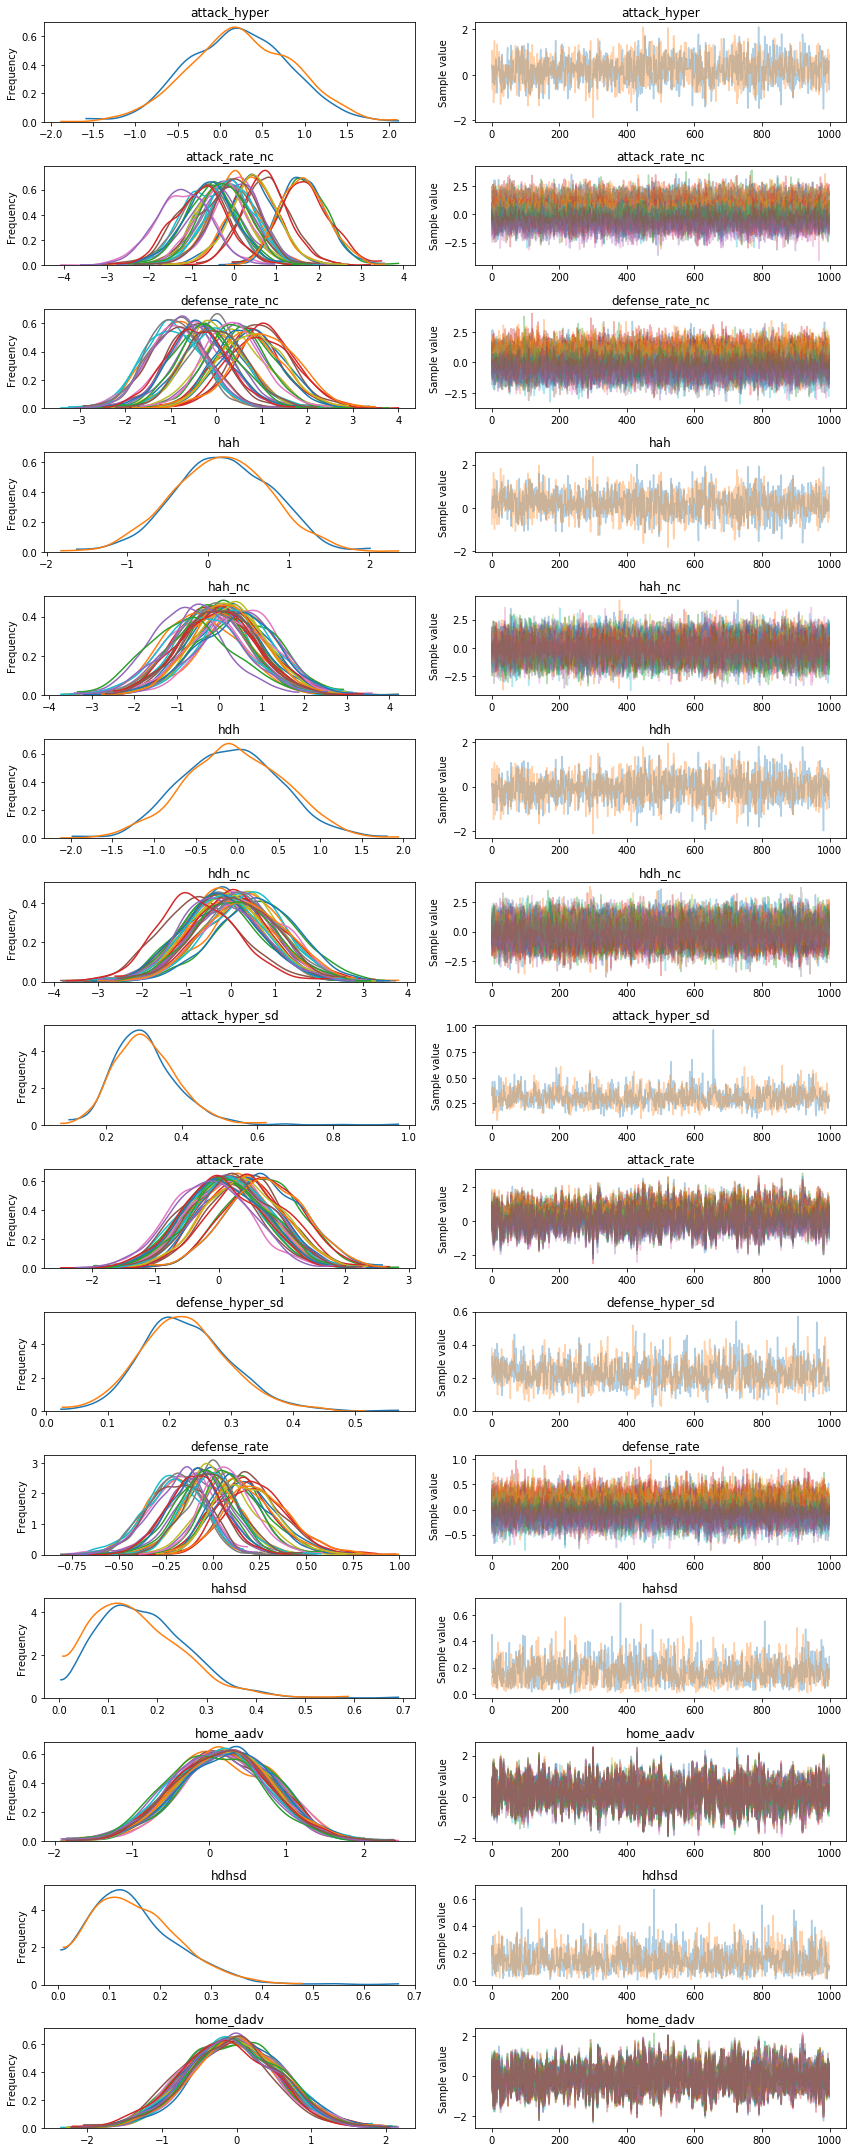

In [49]:
with model:
    
    trace = pm.sample(1000, tune=500, njobs=2)
    
pm.traceplot(trace);

With some data-fu we reorganize the posterior samples to be able to compare the rates per team. To keep things readable, we only plot the medians, which will disappoint the true Bayesian warriors among you. 

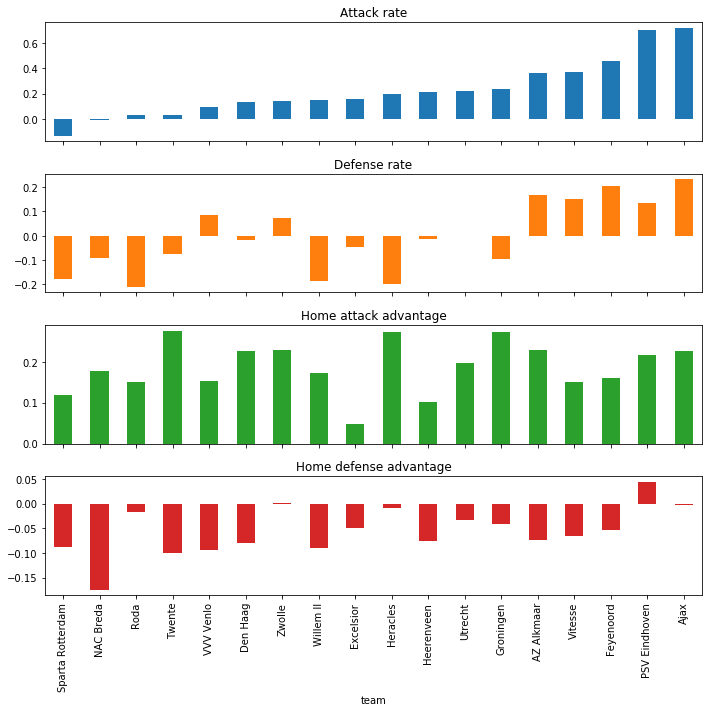

In [50]:
team_names = comp.hometeam.cat.categories
post = pm.trace_to_dataframe(trace, varnames=["attack_rate", "defense_rate", "home_aadv", "home_dadv"])

post = post.stack().reset_index()
post.columns = "sample", "param", "value"

q = post.param.str.contains("__")

post.loc[q, "team"] = team_names[post[q].param.str.split('__').str.get(-1).astype(int)]
post["type"] = post.param.str.split('__').str.get(0)

labels = {
    "attack_rate": "Attack rate",
    "defense_rate": "Defense rate",
    "home_aadv": "Home attack advantage",
    "home_dadv": "Home defense advantage"
}

ax = post.groupby(['type', 'team']).value.median().unstack(0).sort_values("attack_rate").\
        rename(columns = labels).plot.bar(subplots = True, figsize = (10, 10), legend = False)

plt.tight_layout()

By setting new values for the shared predictor variables, we can use the compiled model to get some simulated outcomes. This is now really quick and takes only a couple of seconds for 1000 simulated competitions! 

In [51]:
## simulate matches

hometeam.set_value(not_played.hometeam.cat.codes.astype('int8').values)
awayteam.set_value(not_played.awayteam.cat.codes.astype('int8').values)

with model: 

    ppc = pm.sample_ppc(trace, samples = 1000)
    
ppc

100%|██████████| 1000/1000 [00:00<00:00, 1451.39it/s]


{'away_goals': array([[5, 2, 2, ..., 1, 1, 1],
        [1, 2, 0, ..., 2, 0, 0],
        [1, 1, 2, ..., 2, 3, 0],
        ..., 
        [2, 2, 2, ..., 1, 1, 0],
        [4, 2, 4, ..., 1, 0, 0],
        [5, 2, 1, ..., 2, 1, 3]]),
 'home_goals': array([[1, 1, 0, ..., 1, 3, 4],
        [2, 4, 0, ..., 0, 0, 1],
        [1, 1, 3, ..., 1, 2, 5],
        ..., 
        [2, 2, 2, ..., 0, 0, 1],
        [2, 1, 1, ..., 4, 7, 1],
        [0, 0, 4, ..., 4, 1, 1]])}

In [52]:
ppc["home_goals"].shape

(1000, 117)

Now we have a 1000 simulated competitions, which has 117 matches to be played still. Each of these 1000 simulations is a full hypothetical match schedule. Let's have a look at 2 simulated outcomes for the homematches of Ajax. 

In [55]:
comp.loc[~comp.played, "ftag"] = ppc["away_goals"][0]
comp.loc[~comp.played, "fthg"] = ppc["home_goals"][0]

comp[(comp.hometeam == "Ajax") & ~comp.played]

,hometeam,awayteam,date,fthg,ftag,played
274,Ajax,Den Haag,NaT,2.0,1.0,False
275,Ajax,Heracles,NaT,2.0,0.0,False
276,Ajax,VVV Venlo,NaT,3.0,1.0,False
277,Ajax,AZ Alkmaar,NaT,2.0,2.0,False
278,Ajax,Heerenveen,NaT,2.0,2.0,False
279,Ajax,Twente,NaT,2.0,0.0,False


In [56]:
comp.loc[~comp.played, "ftag"] = ppc["away_goals"][1]
comp.loc[~comp.played, "fthg"] = ppc["home_goals"][1]

comp[(comp.hometeam == "Ajax") & ~comp.played]

,hometeam,awayteam,date,fthg,ftag,played
274,Ajax,Den Haag,NaT,5.0,0.0,False
275,Ajax,Heracles,NaT,1.0,2.0,False
276,Ajax,VVV Venlo,NaT,5.0,2.0,False
277,Ajax,AZ Alkmaar,NaT,3.0,0.0,False
278,Ajax,Heerenveen,NaT,6.0,1.0,False
279,Ajax,Twente,NaT,5.0,0.0,False


There is considerable variance here, but overall the predictions for Ajax are pretty positive. Their opponents in Amsterdam, their homecrowd, are a bit weaker, as can be seen from the current standings as well. 

Below, we generate one simulated ranking and view the end result. 

In [63]:
def get_standing(comp, ppc, simulation):

    comp.loc[~comp.played, "ftag"] = ppc["away_goals"][simulation]
    comp.loc[~comp.played, "fthg"] = ppc["home_goals"][simulation]

    comp["homepoints"] = (3 * (comp.fthg > comp.ftag)).fillna(0) + (1 * (comp.fthg == comp.ftag)).fillna(0)
    comp["awaypoints"] = (3 * (comp.ftag > comp.fthg)).fillna(0) + (1 * (comp.fthg == comp.ftag)).fillna(0)

    standing = comp.groupby("hometeam").homepoints.sum().to_frame().join(
        comp.groupby("awayteam").awaypoints.sum()
    ).join(
        comp.groupby("hometeam").fthg.sum()
    ).join(
        comp.groupby("awayteam").ftag.sum()
    ).join(
        comp.groupby("hometeam").ftag.sum().rename("homegoals_against")
    ).join(
        comp.groupby("awayteam").fthg.sum().rename("awaygoals_against")
    )

    standing["points"] = standing.homepoints + standing.awaypoints
    standing["goals"] = standing.fthg + standing.ftag
    standing["goals_against"] = standing.homegoals_against + standing.awaygoals_against
    standing["tally"] = standing.goals - standing.goals_against

    return standing.sort_values(["points", "tally", "goals"], ascending = False).assign(
        rank = list(range(1, len(standing) + 1))
    ).reset_index()

get_standing(comp, ppc, 0)

,hometeam,homepoints,awaypoints,fthg,ftag,homegoals_against,awaygoals_against,points,goals,goals_against,tally,rank
0,PSV Eindhoven,40,41,32.0,53.0,14.0,24.0,81,85.0,38.0,47.0,1
1,Ajax,41,34,44.0,47.0,15.0,15.0,75,91.0,30.0,61.0,2
2,Feyenoord,31,29,31.0,36.0,16.0,14.0,60,67.0,30.0,37.0,3
3,AZ Alkmaar,27,33,31.0,28.0,25.0,17.0,60,59.0,42.0,17.0,4
4,Vitesse,25,34,28.0,34.0,20.0,17.0,59,62.0,37.0,25.0,5
5,Utrecht,31,25,29.0,23.0,20.0,22.0,56,52.0,42.0,10.0,6
6,Zwolle,30,24,22.0,20.0,15.0,24.0,54,42.0,39.0,3.0,7
7,VVV Venlo,22,28,21.0,19.0,22.0,17.0,50,40.0,39.0,1.0,8
8,Groningen,31,16,36.0,22.0,19.0,26.0,47,58.0,45.0,13.0,9
9,Heerenveen,18,28,22.0,35.0,40.0,24.0,46,57.0,64.0,-7.0,10


Not surprisingly, PSV won the 2018 league and Ajax came in runner-up! Feyenoord had a very strong ending to the season. You can compare this to the current standing at https://www.knvb.nl/competities/eredivisie/stand. There are also all kinds of goal counts here, and we could probably fill a magazine with going on about all the details in this. Or a tv-show. But instead, let's generate the heatmap with the final projections, which are an aggregation of 200 simulated seasons like the one above. 

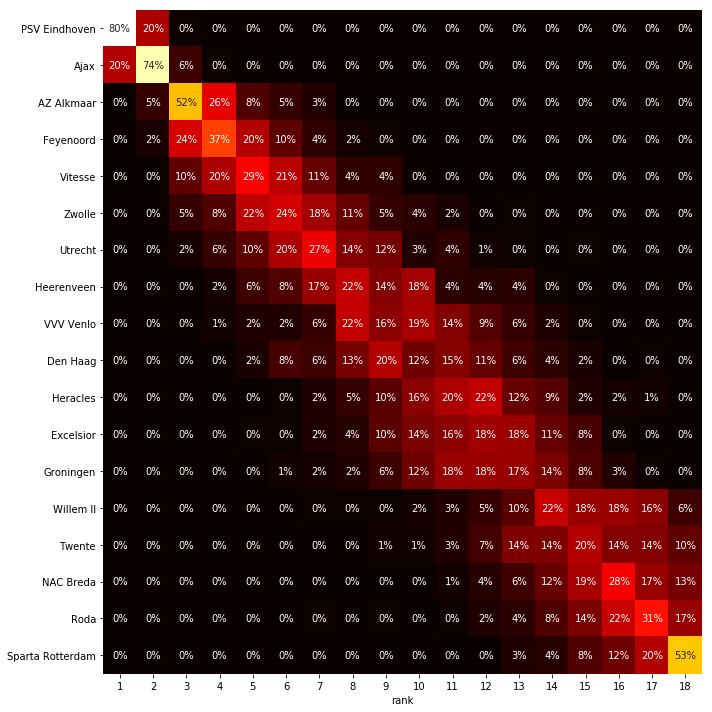

In [64]:
n_teams = len(comp.hometeam.cat.categories)

simulations = pd.concat([get_standing(comp, ppc, i) for i in range(200)])
simulations.groupby("hometeam").rank.value_counts(normalize = True).unstack(1).fillna(0)

rankings_agg = simulations.groupby("hometeam").rank.value_counts(normalize = True).unstack(1).fillna(0)
rankings_agg = rankings_agg.assign(expected = rankings_agg @ np.arange(n_teams + 1, 1, -1)).sort_values("expected", ascending = False).drop("expected", axis = "columns")

plt.figure(figsize = (10, 10))
sns.heatmap(rankings_agg, annot=True, fmt=".0%", cbar=False, cmap="hot")

plt.ylabel("")
plt.tight_layout()

The visualisation above shows for every team, for every position, the percentage of simulations that the team ended up at that position. Based on this heatmap we can see that the remainder of the season is not as exciting as you could hope; PSV has a very high chance of ending on top and at the bottom we see that the chance that Sparta will have to face relagation is more than $50\%$. This last conclusion is quite remarkable as Sparta now shares the last position with Roda, even with one extra match to play. However Sparta's inability to score goals will, according to this model, break them up in the end (_at the moment of publishing this post, Sparta is already losing the race it seems_).

In the middle of the table we see that everything is still pretty open. The only sort of exciting battle will probably be the one for 7<sup>th</sup> place, the last place that gives the right to compete in the play offs for ticket to the second preliminary round of the Europa League. This doesn't seem like much, but every year I am surprised to see players and fans celebrate for this chance to play for a chance to play football in eastern Europe... However, it seems that this competition will come down to 4 or more teams and so we should expect the media to hype this *battle for 7<sup>th<sup>*.

Around the play offs for relegation (positions 16 and 17) things might heat up. Twente and Willem II have a substantial chance of facing these play-offs with the top teams of the Jupiler League (second Dutch profesional competition). 

## Model evaluation

What this approach does not accomodate for is the effect a new trainer appointed during the winter break. No '_Dick Advocaat -_' (Sparta) or '_Erik ten Hag -_' (Ajax) effect can be predicted. The effect of a transfer is also not estimated directly. Basically, the model infers the strengths over the season so far, and extrapolates these over the rest of the season. As such, it is probably too certain of the outcome, as transfer effects, injuries and changes in form can really make the second half of the season different from what we have seen so far. 

The first thing to incorporate in this model would be something that tracks the changes in form over the season. 
Next to that other effects as for example the weather, referee or time of day that a match is played. There is also a real effect of fatigue, were some teams play multiple matches in a week because they're involved in a European League. The effect of fatigue will matter less in the second half of the season, as the Dutch team traditionally don't make it through the winter in these competitions, but it could influence the interpretation of earlier results. It would also be interested to be able to check just how big this effect is. The cool thing about this model in `pymc3` is that it is relatively easy to expand the model and add extra parameters if you, as a data scientist and part-time soccer coach, think it is of importance. 

A necessary step that we ommitted here is an evaluation of this model over the previous years. 

That said, these simulations lead to what we think are very reasonable probabilities, taking well into account the strenth of the opponents that played and those that are still on schedule. The model might also be useful in practice to give teams an indication on what they should improve on. 

What's nice is that we needed only a relatively small amount of data in order to learn this model. In the age of Big Data, not all data sets are large and this technique offers a great way to build robust models that also give some certainty about their uncertainty. This, along with the fact that it is possible to interpret the parameters in the model makes Bayesian multilevel modelling an extremely powerful tool. Thanks also to the NUTS-sampler of course, and the `pymc3` developers that made it available to use so easily. 

<hr\>

<div style="text-align: right">
_"Als ik zou willen dat je het begreep, dan had ik wel beter uitgelegd!" - Johan Cruyff_
</div>

## Bye!

That was it. If you want to know more, reach out to Xomnia via the website! We can help you build models of your own data, provide trainings, for example in Bayesian modelling. If you'd like to learn more about these techniques as a starting data scientist, join our traineeship! 